<a href="https://colab.research.google.com/github/BrunoDkno368/Proyecto-de-An-lisis-de-Ventas-ETL-EDA/blob/main/4_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ETL

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##EXTRAER (E)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/portfolio prof/04-10/ventas_erroneas.csv')
df.sample(3)

,id_venta,fecha,producto,categoria,precio_unitario,cantidad,cliente,ciudad
724,725,2024-12-25,Laptop,NaN,999.99,3.0,Pedro,NaN
922,923,2025-07-11,Laptop,Accesorios,49.99,1.0,Luis,NaN
541,542,2024-06-25,Celular,Computación,499.99,NaN,María,Mendoza


### VISTA INICIAL DEL DF

In [ ]:
print(df.info())
print(df.isnull().sum())
print('El registro tiene una cantidad', df.duplicated().sum(),'de duplicados')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_venta         1050 non-null   int64  
 1   fecha            1050 non-null   object 
 2   producto         807 non-null    object 
 3   categoria        731 non-null    object 
 4   precio_unitario  749 non-null    float64
 5   cantidad         735 non-null    float64
 6   cliente          774 non-null    object 
 7   ciudad           741 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.8+ KB
None
id_venta             0
fecha                0
producto           243
categoria          319
precio_unitario    301
cantidad           315
cliente            276
ciudad             309
dtype: int64
El registro tiene una cantidad 50 de duplicados


PODEMOS VER QUE TIENE 50 DUPLICADOS Y POR CATEGORIA TIENE DATOS NULOS

## TRANSFORMACION (T)

### DUPLICADOS

#### ELIMINAMOS DUPLICADOS

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

CONFIRMAMOS QUE FUERON ELIMINADOS

### ESPACIOS Y VACIOS

####  CORREGIMOS ESPACIOS Y VACIOS

In [ ]:
df.isnull().sum()

,0
id_venta,0
fecha,0
producto,232
categoria,310
precio_unitario,290
cantidad,295
cliente,263
ciudad,294


In [ ]:
col_texto = ['producto', 'categoria', 'cliente', 'ciudad']
for col in col_texto:
  df[col]= df[col].astype(str).str.strip().replace({"None":"", "nan":""})

In [ ]:
df.isnull().sum()

,0
id_venta,0
fecha,0
producto,0
categoria,0
precio_unitario,290
cantidad,295
cliente,0
ciudad,0


CONFIRMAMOS QUE LAS CATEGORIAS QUE TENIAN NULOS Y ESPACIOS QUEDARON CON NAN O NONE

### NULOS

####VACIOS EN PRODUCTO

In [ ]:
df['producto'].unique()

array(['', 'Monitor', 'Teclado', 'Tablet', 'Celular', 'Laptop'],
      dtype=object)

In [ ]:
df['producto']= df['producto'].replace('', np.nan).fillna('Sin especificar')

In [ ]:
df['producto'].unique()

array(['Sin especificar', 'Monitor', 'Teclado', 'Tablet', 'Celular',
       'Laptop'], dtype=object)

CONFIRMAMOS QUE NO QUEDAN VACIOS

####VACIOS EN CATEGORIA

In [ ]:
df['categoria'].unique()

array(['Computación', 'Electrónica', '', 'Audio', 'Accesorios'],
      dtype=object)

In [ ]:
df['categoria'] = df['categoria'].replace("", np.nan).fillna("Sin categoria")

In [ ]:
df['categoria'].unique()

array(['Computación', 'Electrónica', 'Sin categoria', 'Audio',
       'Accesorios'], dtype=object)

CONFIRMAMOS QUE NO QUEDAN VACIOS EN CATEGORIA

####VACIOS EN PRECIO UNITARIO

In [ ]:
df['precio_unitario'].isnull().sum()

np.int64(290)

In [ ]:
df = df.dropna(subset=['precio_unitario'])

In [ ]:
df['precio_unitario'].isnull().sum()

np.int64(0)

CONFIRMAOS QUE ELIMINAMOS VACIOS

####VACIOS EN CUIDAD

In [ ]:
df['ciudad'].unique()

array(['Córdoba', 'Buenos Aires', '', 'Mendoza', 'Rosario', 'Salta'],
      dtype=object)

In [ ]:
df['ciudad'] = df['ciudad'].replace("", np.nan).fillna("No especificada")

In [ ]:
df['ciudad'].unique()

array(['Córdoba', 'Buenos Aires', 'No especificada', 'Mendoza', 'Rosario',
       'Salta'], dtype=object)

In [ ]:
df['precio_unitario'].unique()

array([-100.  ,  999.99,  499.99,  199.99,   49.99])

PRECIO UNITARIO POSEE VALORES NEGATIVOS

In [ ]:
df['cantidad'].unique()

array([ 1.,  3., nan,  5., -2.,  2.])

### VALORES NEGATIVOS

CANTIDAD TAMBIEN POSEEE NEGATIVOS

In [ ]:
df["precio_unitario"] = df["precio_unitario"].apply(lambda x: abs(x) if x is not None else x)
df["cantidad"] = df["cantidad"].apply(lambda x: abs(x) if pd.notnull(x) else x)

In [ ]:
print(df['precio_unitario'].unique())
print(df['cantidad'].unique())

[100.   999.99 499.99 199.99  49.99]
[ 1.  3. nan  5.  2.]


####CORREGIMOS LOS VALORES NEGATIVOS

In [ ]:
df['cantidad'].unique()

array([ 1.,  3., nan,  5.,  2.])

verificamos que cantidad tiene valores nulos (suponemos que tiene al menos un producto ventido)

In [ ]:
df['cantidad']= df['cantidad'].fillna(1)

In [ ]:
df['cantidad'].unique()

array([1., 3., 5., 2.])

###CREAMOS COLUMA QUE NOS FALTA TOTAL DE VENTAS

In [ ]:
df.columns

Index(['id_venta', 'fecha', 'producto', 'categoria', 'precio_unitario',
       'cantidad', 'cliente', 'ciudad'],
      dtype='object')

In [ ]:
df['total_ventas'] = df['cantidad'] * df['precio_unitario']
df.head()

,id_venta,fecha,producto,categoria,precio_unitario,cantidad,cliente,ciudad,total_ventas
0,1,2023-01-01,Sin especificar,Computación,100.00,1.0,Luis,Córdoba,100.00
2,3,2023-01-03,Teclado,Electrónica,999.99,3.0,Juan,Buenos Aires,2999.97
4,5,2023-01-05,Tablet,Sin categoria,499.99,3.0,Juan,Córdoba,1499.97
5,6,2023-01-06,Celular,Sin categoria,199.99,1.0,,No especificada,199.99
6,7,2023-01-07,Teclado,Sin categoria,999.99,1.0,Pedro,Buenos Aires,999.99


In [ ]:
df['fecha']= pd.to_datetime(df['fecha'], errors= 'coerce' )

In [ ]:
print("✅ Datos limpios:")
print(df.head())

✅ Datos limpios:
   id_venta      fecha         producto      categoria  precio_unitario  \
0         1 2023-01-01  Sin especificar    Computación           100.00   
2         3 2023-01-03          Teclado    Electrónica           999.99   
4         5 2023-01-05           Tablet  Sin categoria           499.99   
5         6 2023-01-06          Celular  Sin categoria           199.99   
6         7 2023-01-07          Teclado  Sin categoria           999.99   

   cantidad cliente           ciudad  total_ventas  
0       1.0    Luis          Córdoba        100.00  
2       3.0    Juan     Buenos Aires       2999.97  
4       3.0    Juan          Córdoba       1499.97  
5       1.0          No especificada        199.99  
6       1.0   Pedro     Buenos Aires        999.99  


##CARGA (L)

In [ ]:
df = df.to_csv('ventas_limpias.csv', index=False)

#EDA

###VENTAS TOTALES

In [ ]:
df = pd.read_csv('/content/ventas_limpias.csv')
df.sample(3)

,id_venta,fecha,producto,categoria,precio_unitario,cantidad,cliente,ciudad,total_ventas
157,223,2023-08-11,Sin especificar,Electrónica,199.99,1.0,NaN,Rosario,199.99
89,125,2023-05-05,Teclado,Electrónica,49.99,5.0,Pedro,No especificada,249.95
553,773,2025-02-11,Laptop,Sin categoria,199.99,3.0,Ana,No especificada,599.97


In [ ]:
ventas_totales= df['total_ventas'].sum().round(2)
print('las ventas totals son: $', ventas_totales)



las ventas totals son: $ 545337.47


## TICKET PROMEDIO

In [ ]:
tk_prom= df['total_ventas'].mean().round(2)
print('El tk promedio de venta es: $', tk_prom)

El tk promedio de venta es: $ 768.08


##PRODUCTO MAS VENDIDO

In [ ]:
mas_vendido = df.groupby('producto')['total_ventas'].sum().sort_values(ascending=False)
print(' el producto mas vendido es: ', mas_vendido.head(1))

 el producto mas vendido es:  producto
Celular    139396.79
Name: total_ventas, dtype: float64


##VISUALIZACIONES

###VENTAS POR CATEGORIA

/tmp/ipython-input-4068223935.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='categoria', y= 'total_ventas', data=df, estimator=sum, ci=None)


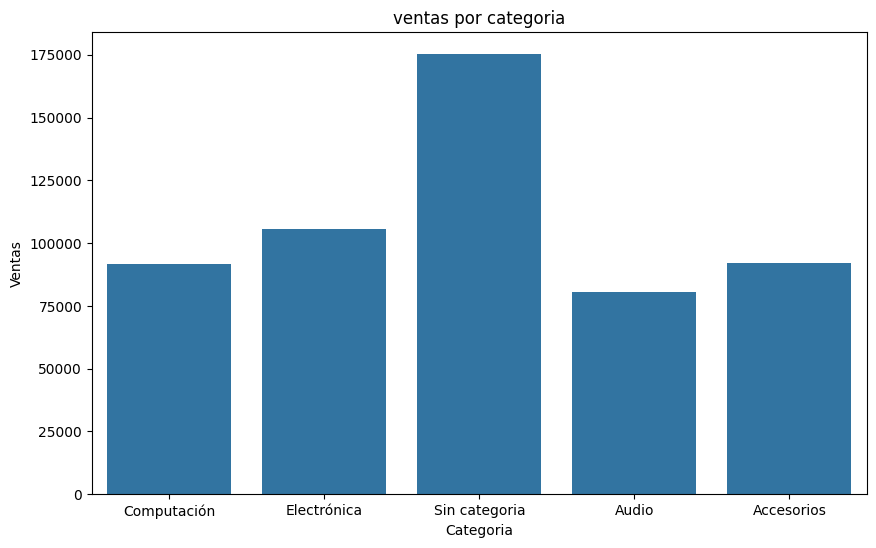

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='categoria', y= 'total_ventas', data=df, estimator=sum, ci=None)
plt.title('ventas por categoria')
plt.xlabel("Categoria")
plt.ylabel('Ventas')
plt.show()

## TOP 5 PROD MAS VENDIDOS

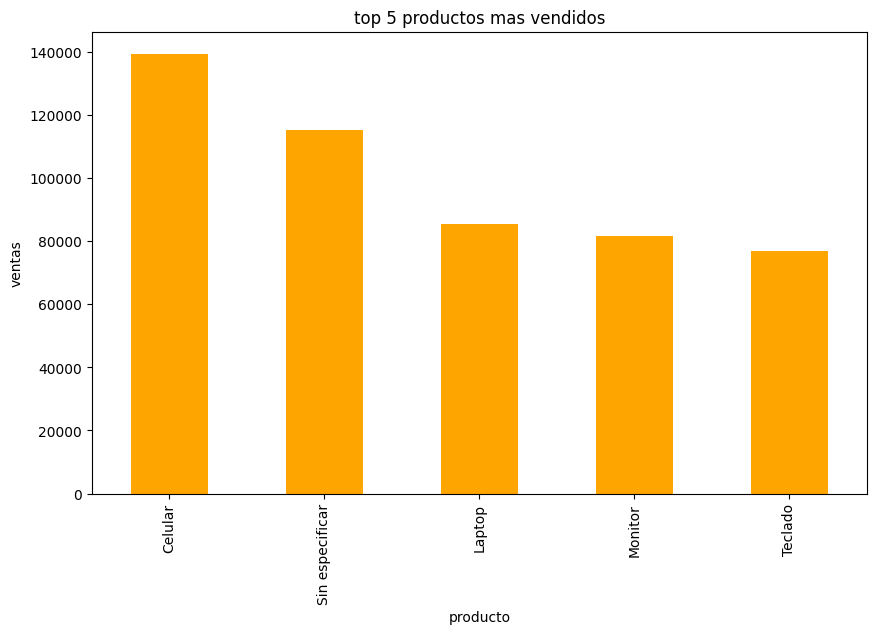

In [ ]:
top_prod= df.groupby('producto')['total_ventas'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
top_prod.plot(kind='bar', color='orange')
plt.title('top 5 productos mas vendidos')
plt.xlabel('producto')
plt.ylabel('ventas')
plt.show()